# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

The autocorrelation function allows us to investigate the presence of memory or statistical dependence in a process. Memory in a complex system is the ability of past events to act as an influence on future dynamics.

The autocorrelation function of a stationary random process, $x$, is in essence the statistical covariance of the process with a time-delayed copy of itself. It is defined, for any time lag $\tau > 0$, as:

$$ Ac_{[x]} (\tau) \equiv \frac{cov_{[x,x]}(t,t+\tau)}{\sqrt{cov_{[x,x]}(t,t)} \sqrt{cov_{[x,x]}(t+\tau,t+\tau)}} = \frac{cov_{[x,x]}(t,t+\tau)}{cov_{[x,x]}(t,t)} = \frac{\langle x(t) x(t+\tau) \rangle - \langle x(t) \rangle \langle x(t+\tau) \rangle}{ \sigma_x^2}.$$

In this case $x(t)$ is a series of instantaneous values of potential energy $U(t)$.

Let us say $t_i = 1$ and $t_f = M$ (steps of our Monte Carlo simulations), then at a certain delay $\tau$:

$$ \langle U(t) U(t+\tau) \rangle = \frac{U(1)U(1+\tau) ... + U(t_f - \tau)U(t_f)}{t_f - \tau} = \frac{1}{t_f - \tau} \sum_{t=1}^{t_f - \tau} U(t) U(t+\tau), $$

$$ \langle U(t) \rangle \langle U(t+\tau) \rangle = \left( \frac{U(1) ... + U(t_f)}{t_f - \tau} \right) \left( \frac{U(1+\tau) ... + U(t_f)}{t_f - \tau} \right) = \left( \frac{1}{t_f - \tau} \sum_{t=1}^{t_f-\tau} U(t) \right) \left( \frac{1}{t_f-\tau} \sum_{t=1}^{t_f-\tau} U(t+\tau) \right). $$

$\sigma_U^2$ is the variance:

$$ \sigma_U^2 = \frac{1}{t_f} \sum_{t=1}^{t_f} U^2(t) - \left( \frac{1}{t_f} \sum_{t=1}^{t_f} U(t) \right)^2.$$

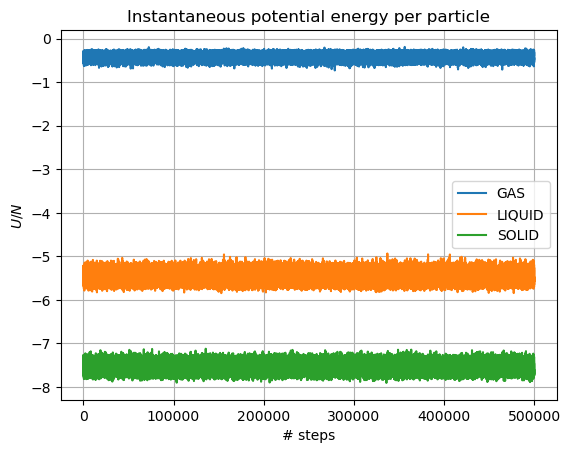

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

pe_gas = []
pe_liquid = []
pe_solid = []

with open('results/Exercise_07-2/GAS/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_gas.append(float(elements[1]))
file.close()

with open('results/Exercise_07-2/LIQUID/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_liquid.append(float(elements[1]))
file.close()

with open('results/Exercise_07-2/SOLID/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_solid.append(float(elements[1]))
file.close()

N = np.arange(1,len(pe_gas)+1)

plt.plot(N,pe_gas,label='GAS')
plt.plot(N,pe_liquid,label='LIQUID')
plt.plot(N,pe_solid,label='SOLID')
plt.ylabel(r'$U/N$')
plt.xlabel('# steps')
plt.title('Instantaneous potential energy per particle')
plt.legend()
plt.grid(True)

plt.show()

In [7]:
max_lag = 1000

N = np.arange(0,max_lag)

def autocorrelation(data, max_lag):
    t_max = len(data)
    mean = np.mean(data)
    var = np.var(data)
    acf = []

    for t in range(max_lag):
        cov = np.mean([data[tprime] * data[tprime + t] for tprime in range(t_max - t)]) - \
              np.mean([data[tprime] for tprime in range(t_max - t)]) * \
              np.mean([data[tprime + t] for tprime in range(t_max - t)])
        acf.append(cov / var)

    return np.array(acf)

In [8]:
ac_gas = autocorrelation(pe_gas,max_lag)
ac_liquid = autocorrelation(pe_liquid,max_lag)
ac_solid = autocorrelation(pe_solid,max_lag)

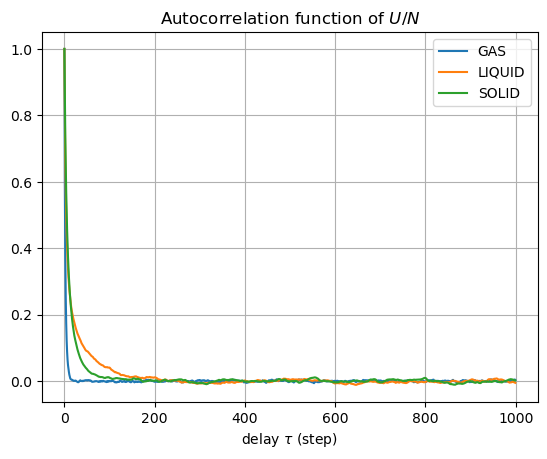

In [39]:
N = np.arange(0,max_lag)

plt.plot(N,ac_gas,label='GAS')
plt.plot(N,ac_liquid,label='LIQUID')
plt.plot(N,ac_solid,label='SOLID')
plt.title(r'Autocorrelation function of $U/N$')
plt.xlabel(r'delay $\tau$ (step)')
plt.legend()
plt.grid(True)
plt.show()

Both gas, liquid and solid become independent from their past histort after a certain lapse of time. At about $\tau_c = 200 \; steps$ every process has no memory about itself beyond $\tau_c$.

Therefore we'll perform simulations with $L = 200$ number of steps in each block.

In [11]:
import math

def error(AV,AV2,n): # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

L = [10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 625, 1000]

M=500000 # Total number of throws

file = open('results/sigma-gas.out','w')

for i in range(len(L)): # ciclo for sugli elementi di L (array di numeri di passi per blocco)
    N = int(M/L[i])     # per l'i-esima iterazione ci sono N blocchi
    ave = np.zeros(N)     # Empty array of dimension M/i
    av2 = np.zeros(N)
    sum_prog = 0
    su2_prog = 0
    for j in range(N): # loop over the number of blocks
        sum1 = 0 
        sum2 = 0
        for k in range(L[i]): # for loop that iterates over the throws of each block
            l = k+j*L[i]
            sum1 += pe_gas[l]   # sum of the L numbers randomly generated in the i-th block
            sum2 += pe_gas[l]*pe_gas[l] #PROVA
        ave[j] = sum1/L[i]     # r_i 
        av2[j] = ave[j]**2 # (r_i)^2
    for j in range(N):
        sum_prog += ave[j] # SUM_{j=0,i} r_j
        su2_prog += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog/=N # Cumulative average
    su2_prog/=N # Cumulative square average
    file.write(str(error(sum_prog,su2_prog,N)) + '\n')

file.close()

file = open('results/sigma-liquid.out','w')

for i in range(len(L)): # ciclo for sugli elementi di L (array di numeri di passi per blocco)
    N = int(M/L[i])     # per l'i-esima iterazione ci sono N blocchi
    ave = np.zeros(N)     # Empty array of dimension M/i
    av2 = np.zeros(N)
    sum_prog = 0
    su2_prog = 0
    for j in range(N): # loop over the number of blocks
        sum1 = 0 
        sum2 = 0
        for k in range(L[i]): # for loop that iterates over the throws of each block
            l = k+j*L[i]
            sum1 += pe_liquid[l]   # sum of the L numbers randomly generated in the i-th block
            sum2 += pe_liquid[l]*pe_liquid[l] #PROVA
        ave[j] = sum1/L[i]     # r_i 
        av2[j] = ave[j]**2 # (r_i)^2
    for j in range(N):
        sum_prog += ave[j] # SUM_{j=0,i} r_j
        su2_prog += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog/=N # Cumulative average
    su2_prog/=N # Cumulative square average
    file.write(str(error(sum_prog,su2_prog,N)) + '\n')

file.close()

file = open('results/sigma-solid.out','w')

for i in range(len(L)): # ciclo for sugli elementi di L (array di numeri di passi per blocco)
    N = int(M/L[i])     # per l'i-esima iterazione ci sono N blocchi
    ave = np.zeros(N)     # Empty array of dimension M/i
    av2 = np.zeros(N)
    sum_prog = 0
    su2_prog = 0
    for j in range(N): # loop over the number of blocks
        sum1 = 0 
        sum2 = 0
        for k in range(L[i]): # for loop that iterates over the throws of each block
            l = k+j*L[i]
            sum1 += pe_solid[l]   # sum of the L numbers randomly generated in the i-th block
            sum2 += pe_solid[l]*pe_solid[l] #PROVA
        ave[j] = sum1/L[i]     # r_i 
        av2[j] = ave[j]**2 # (r_i)^2
    for j in range(N):
        sum_prog += ave[j] # SUM_{j=0,i} r_j
        su2_prog += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog/=N # Cumulative average
    su2_prog/=N # Cumulative square average
    file.write(str(error(sum_prog,su2_prog,N)) + '\n')

file.close()

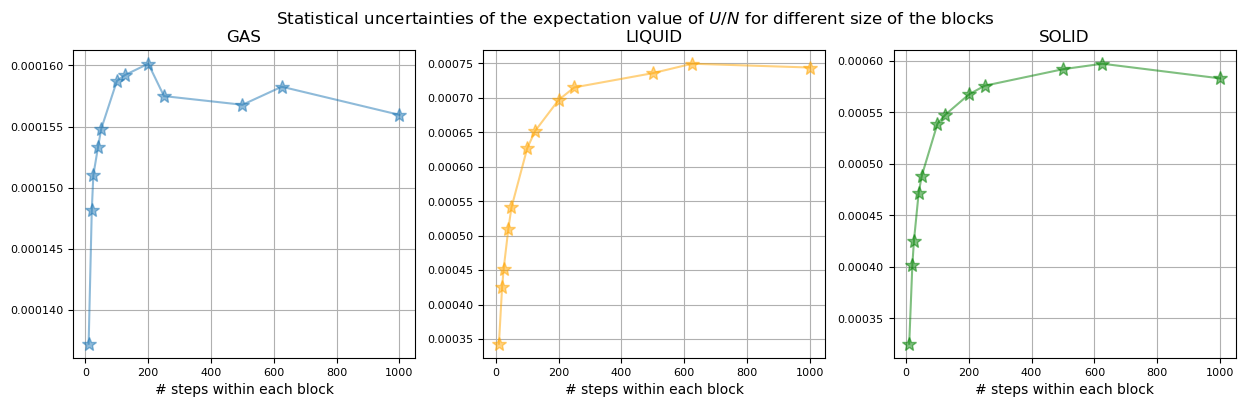

In [61]:
sigma_gas = np.loadtxt('results/sigma-gas.out')
sigma_liquid = np.loadtxt('results/sigma-liquid.out')
sigma_solid = np.loadtxt('results/sigma-solid.out')

fig, plts = plt.subplots(1, 3, figsize=(15, 4))

plts[0].plot(L, sigma_gas, marker='*',markersize=10,linestyle='-',alpha=0.5)
plts[0].set_title('GAS')
plts[1].plot(L, sigma_liquid, marker='*',color='orange',markersize=10,linestyle='-',alpha=0.5)
plts[1].set_title('LIQUID')
plts[2].plot(L, sigma_solid, marker='*',color='green',markersize=10,linestyle='-',alpha=0.5)
plts[2].set_title('SOLID')

for i in range(3):
    plts[i].tick_params(axis='both', which='major', labelsize=8)
    plts[i].set_xlabel('# steps within each block')
    plts[i].grid(True)

fig.suptitle(r'Statistical uncertainties of the expectation value of $U/N$ for different size of the blocks')

plt.show()

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

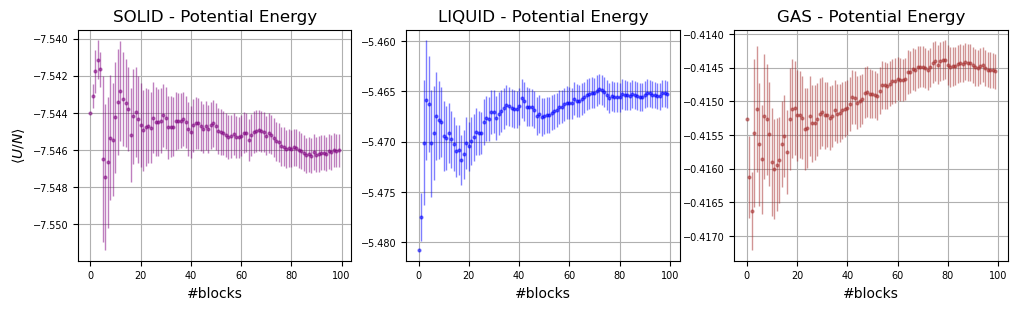

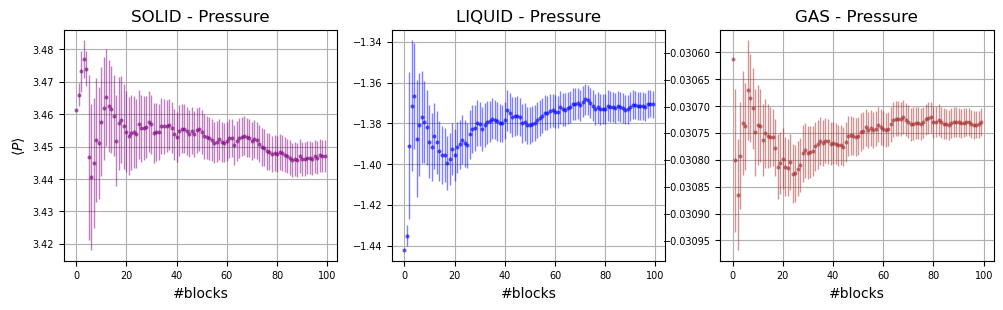

In [3]:
fig2, pe = plt.subplots(1, 3, figsize=(12, 3))
fig5, pr = plt.subplots(1, 3, figsize=(12, 3))

sim = ["SOLID","LIQUID","GAS"]
colors = ['purple','blue','brown']

for i in range(3):
    mean = []
    sigma = []
    with open('results/Exercise_07-4/NVT/'+sim[i]+"/potential_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pe[i].errorbar(range(len(mean)), mean,yerr=sigma, marker='o', markersize=2, linestyle='', elinewidth=1, alpha=0.5, color=colors[i])
    pe[i].set_xlabel('#blocks')
    pe[0].set_ylabel(r'$\langle U/N \rangle$')
    pe[i].set_title(sim[i]+" - Potential Energy")
    pe[i].grid(True)
    pe[i].tick_params(axis='both', which='major', labelsize=7)

for i in range(3):
    mean = []
    sigma = []
    with open('results/Exercise_07-4/NVT/'+sim[i]+"/pressure.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pr[i].errorbar(range(len(mean)), mean,yerr=sigma, marker='o', markersize=2, linestyle='', elinewidth=1, alpha=0.5, color=colors[i])
    pr[i].set_xlabel('#blocks')
    pr[0].set_ylabel(r'$\langle P \rangle$')
    pr[i].set_title(sim[i]+" - Pressure")
    pr[i].grid(True)
    pr[i].tick_params(axis='both', which='major', labelsize=7)

#### Radial distribution function - NVE vs NVT simulations

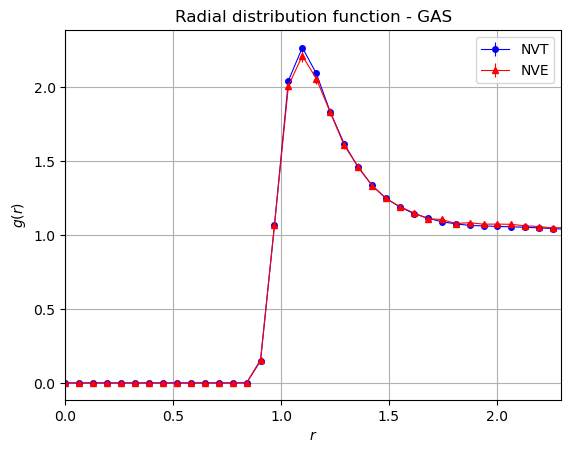

In [4]:
nbin = []
mean_NVT = []
sigma_NVT = []
mean_NVE = []
sigma_NVE = []

with open('results/Exercise_07-4/NVT/GAS/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVT.append(float(elements[1]))
        sigma_NVT.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVT,yerr=sigma_NVT,marker='o',markersize=4,label='NVT',linewidth=0.8,color='blue')

nbin = []

with open('results/Exercise_07-4/NVE/GAS/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVE.append(float(elements[1]))
        sigma_NVE.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVE,yerr=sigma_NVE,marker='^',markersize=4,label='NVE',linewidth=0.8,color='red')
    
plt.xlabel(r'$r$')
plt.ylabel(r'$g(r)$')
plt.title(r'Radial distribution function - GAS')
plt.xlim(0,2.3)
plt.grid(True)
plt.legend()
plt.show()

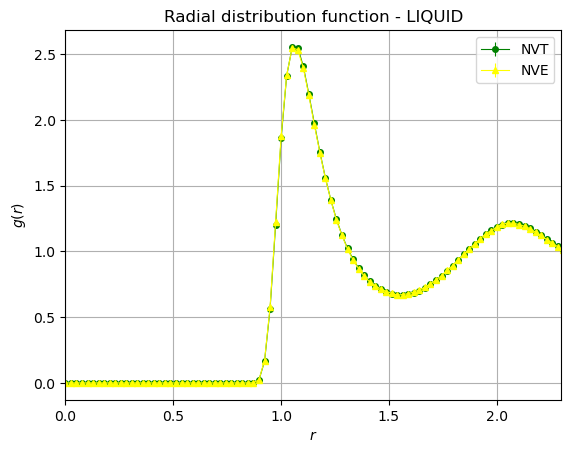

In [5]:
nbin = []
mean_NVT = []
sigma_NVT = []
mean_NVE = []
sigma_NVE = []

with open('results/Exercise_07-4/NVT/LIQUID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVT.append(float(elements[1]))
        sigma_NVT.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVT,yerr=sigma_NVT,marker='o',markersize=4,label='NVT',linewidth=0.8,color='green')

nbin = []

with open('results/Exercise_07-4/NVE/LIQUID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVE.append(float(elements[1]))
        sigma_NVE.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVE,yerr=sigma_NVE,marker='^',markersize=4,label='NVE',linewidth=0.8,color='yellow')
    
plt.xlabel(r'$r$')
plt.ylabel(r'$g(r)$')
plt.title(r'Radial distribution function - LIQUID')
plt.xlim(0,2.3)
plt.grid(True)
plt.legend()
plt.show()

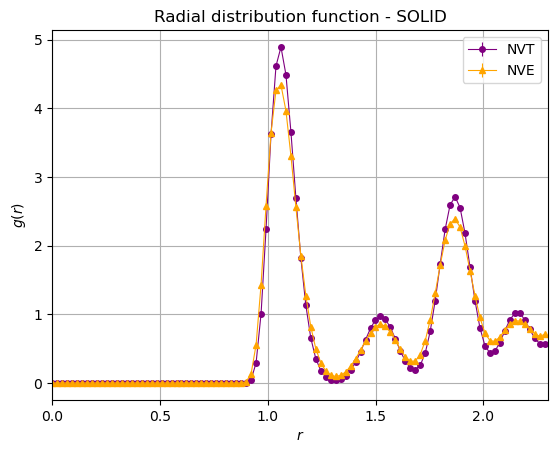

In [6]:
nbin = []
mean_NVT = []
sigma_NVT = []
mean_NVE = []
sigma_NVE = []

with open('results/Exercise_07-4/NVT/SOLID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVT.append(float(elements[1]))
        sigma_NVT.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVT,yerr=sigma_NVT,marker='o',markersize=4,label='NVT',linewidth=0.8,color='purple')

nbin = []

with open('results/Exercise_07-4/NVE/SOLID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVE.append(float(elements[1]))
        sigma_NVE.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVE,yerr=sigma_NVE,marker='^',markersize=4,label='NVE',linewidth=0.8,color='orange')
    
plt.xlabel(r'$r$')
plt.ylabel(r'$g(r)$')
plt.title(r'Radial distribution function - SOLID')
plt.xlim(0,2.3)
plt.grid(True)
plt.legend()
plt.show()